Привет, меня зовут Артем Хуршудов. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

### <font color='orange'>Общее впечатление</font>
* Этот проект выполнен очень хорошо.
* Молодец, что структурируешь ноутбук, приятно проверять такие работы.
* Советую использовать маркеры, жирный шрифт итд в текстовых комментариях. Хорошо структурированную информацию намного легче воспринимать.
* Интересная статья про одну из метрик: <a href="https://dyakonov.org/2017/07/28/auc-roc-площадь-под-кривой-ошибок/">ссылка</a>.
* В работе допущена ошибка. Однако исправления не займут много времени.
* Жду новую версию проекта.

### <font color='orange'>Общее впечатление (ревью 2)</font>
* После исправлений проект улучшился и теперь он может быть зачтен.
* Удачи в дальнейшем обучении и следующих работах!

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Общее-впечатление" data-toc-modified-id="Общее-впечатление-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span><font color="orange">Общее впечатление</font></a></span></li><li><span><a href="#Общее-впечатление-(ревью-2)" data-toc-modified-id="Общее-впечатление-(ревью-2)-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span><font color="orange">Общее впечатление (ревью 2)</font></a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали ежемесячно уходить клиенты, хоть и в небольшом количестве. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет на основании предоставленных исторических данных о поведении клиентов и расторжении договоров с банком. 

Построим модель с предельно большим значением *F1*-меры, больше 0.59. Проверим *F1*-меру на тестовой выборке.

Дополнительно измерим *AUC-ROC*, сравнивним её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Признаки** <br>
* RowNumber — индекс строки в данных
* CustomerId — уникальный идентификатор клиента
* Surname — фамилия
* CreditScore — кредитный рейтинг
* Geography — страна проживания
* Gender — пол
* Age — возраст
* Tenure — сколько лет человек является клиентом банка
* Balance — баланс на счёте
* NumOfProducts — количество продуктов банка, используемых клиентом
* HasCrCard — наличие кредитной карты
* IsActiveMember — активность клиента
* EstimatedSalary — предполагаемая зарплата

**Целевой признак** <br>
* Exited — факт ухода клиента

## Подготовка данных

Импортируем библиотеки.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.utils import shuffle
import random
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что все импорты собраны в первой ячейке ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>

Загрузим и рассмотрим данные.

In [2]:
data = pd.read_csv('/datasets/Churn.csv')
print(data.info())
display(data.head())
display(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


С данными, похоже, все в порядке, за исключением пропусков в столбце Tenure.

<div class="alert alert-block alert-success">
<b>Успех:</b> Данные загружены корректно, первичный осмото проведен.
</div>

In [3]:
print(data['Tenure'].nunique())
print(data['Tenure'].value_counts())
print(data['Tenure'].isna().sum())

11
1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64
909


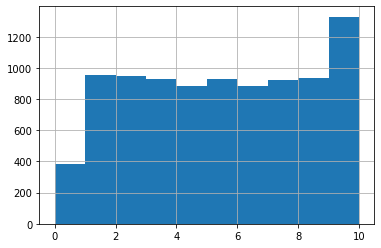

In [4]:
data['Tenure'].hist()

При замене пропусков на медианные или средние значения сильно видоизменяется гистограмма, качество построенных ниже моделей ухудшается. Поэтому попробуем работать, отбросив строки с пропусками в столбце Tenure. (Можно попытаться заполнить пропуски с учетом вероятностей появления присутствующих значений, но как это сделать пока не знаю.)

In [5]:
#data['Tenure'] = data['Tenure'].fillna(data['Tenure'].mean())
data = data.dropna(subset=['Tenure'])
#print(data['Tenure'].nunique())
#print(data['Tenure'].value_counts())
print(data['Tenure'].isna().sum())

0


In [6]:
#data['Tenure'].hist()

In [7]:
#print(data['Tenure'].isna().sum())

<div class="alert alert-block alert-success">
<b>Успех:</b> Обработать прпоуски таким образом – хорошая идея!
</div>

Используя технику прямого кодирования заменим категориальные данные числовыми.

In [8]:
cols = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
data = data[cols]
data_ohe = pd.get_dummies(data, drop_first=True)
display(data_ohe.head())
features = data_ohe.drop('Exited', axis=1)
target = data_ohe['Exited']
display(features.head())
display(target.head())

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,1,0


0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

Разобьем даные на тренировочную, валидационную и выборку для тестирования в пропорции 60-20-20.

<div class="alert alert-block alert-success">
<b>Успех:</b> Закодировать колонки таким образом – самое подходящее решение в данном случае!
</div>

In [9]:
#features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)
features_train, features_double_valid, target_train, target_double_valid = train_test_split(
    features, target, test_size=0.40, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(
    features_double_valid, target_double_valid, test_size=0.50, random_state=12345)
print(features_train.shape, target_train.shape, features_valid.shape, target_valid.shape, features_test.shape, target_test.shape)

(5454, 11) (5454,) (1818, 11) (1818,) (1819, 11) (1819,)


<div class="alert alert-block alert-success">
<b>Успех:</b> Разбение было сделано верно. Радует, что ты сама себя проверяешь.
</div>

Проведем масштабирование необходимых для работы признаков с помощью StandartScaler.

In [10]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])

features_test[numeric] = scaler.transform(features_test[numeric])

print(features_train.head())

      CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
9344     0.809075 -1.039327 -1.025995  0.554904      -0.908179          1   
3796    -1.152518 -1.227561  0.696524  0.480609      -0.908179          0   
7462    -0.398853  0.090079  1.385532 -1.237830      -0.908179          1   
1508    -0.749875 -0.286389  0.352020 -1.237830       0.809300          1   
4478    -1.028628 -0.756975 -0.336987 -1.237830       0.809300          0   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
9344               0         0.019508                  0                0   
3796               0         0.056167                  0                0   
7462               1         0.848738                  0                0   
1508               1        -0.894953                  0                0   
4478               1        -1.284516                  0                0   

      Gender_Male  
9344            0  
3796            1  
7462          

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что scaler был обучен только на тренировочной части данных. Это уменьшает переобучение.
</div>

## Исследование задачи

Обучим модели без учета баланса данных.

In [11]:
# Логистическая регрессия

model_1 = LogisticRegression(solver='liblinear', random_state=12345)
model_1.fit(features_train, target_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=12345, solver='liblinear', tol=0.0001,
                   verbose=0, warm_start=False)

In [12]:
predicted_valid = model_1.predict(features_valid)

In [13]:
probabilities_valid = model_1.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)

f1_score(target_valid, predicted_valid)

0.7736191158144302


0.30400000000000005

In [14]:
# Решающее дерево

model_2 = None
best_result = 0
for depth in range(1, 15):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth) 
    model.fit(features_train, target_train) 
    predictions = model.predict(features_valid) 
    result = f1_score(target_valid, predictions) #accuracy_score(target_valid, predictions) 
    if result > best_result:
        model_2 = model
        best_result = result

probabilities_valid = model_2.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)        
        
print("Решающее дерево: f1 лучшей модели :", best_result)
print(model_2)

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.8346049843812412
Решающее дерево: f1 лучшей модели : 0.5764331210191083
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=12345, splitter='best')


При расчете метрики f1-score видим предупреждение, данную модель нельзя использовать без учета баланса данных.

In [15]:
# Случайный лес

model_3 = None
best_result = 0
for est in range(1, 100):
    #for depth in range(1,15):
        model = RandomForestClassifier(random_state=12345, n_estimators=est) #, max_depth=depth) 
        model.fit(features_train, target_train) 
        predictions = model.predict(features_valid)
        result = f1_score(target_valid, predictions) #model.score(features_valid, target_valid) 
        if result > best_result:
            model_3 = model 
            best_result = result 

probabilities_valid = model_3.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)            
            
print("Случайный лес: f1 наилучшей модели на валидационной выборке:", best_result)
print(model_3)

0.8378704738273045
Случайный лес: f1 наилучшей модели на валидационной выборке: 0.60625
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=13,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)


Наилучший результат показывает модель случайного леса, даже при дисбалансе данных, но посмотрим, улучшится ли результат, если сначала провести балансировку.

<div class="alert alert-block alert-success">
<b>Успех:</b> Этот шаг был сделан отлично! Молодец, что уже тут подобрала параметры!
</div>

## Борьба с дисбалансом

Посмотрим какого отношение числа ушедших клиентам к оставшимся.

In [16]:
ratio = len(data.loc[data['Exited'] == 0]) // len(data.loc[data['Exited'] == 1])
print(ratio)

3


В случае незначительного дисбаланса можно использовать модель логистической регрессии, но это не наш случай, f1-score меньше 0.59.

In [17]:
model_4 = LogisticRegression(solver='liblinear', random_state=12345, class_weight='balanced')
model_4.fit(features_train, target_train)

predicted_valid = model_4.predict(features_valid)

probabilities_valid = model_4.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)

f1_score(target_valid, predicted_valid)

0.7777884132187896


0.509731232622799

Проведем процедуру балансировки, используя upsampling.

In [18]:
#upsampling
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    #repeat = 10
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled = shuffle(features_upsampled, random_state=12345)
    target_upsampled = shuffle(target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, ratio)

print(features_upsampled.shape)
print(target_upsampled.shape)

(7706, 11)
(7706,)


In [19]:
# Логистическая регрессия

model_5 = LogisticRegression(random_state=12345, solver='liblinear')
model_5.fit(features_upsampled, target_upsampled)
predicted_valid = model_5.predict(features_valid)

probabilities_valid = model_5.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)

print("F1:", f1_score(target_valid, predicted_valid))
print(model_5)

0.7773576778578094
F1: 0.5055679287305122
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=12345, solver='liblinear', tol=0.0001,
                   verbose=0, warm_start=False)


In [20]:
# Решающее дерево

model_6 = None
best_result = 0
for depth in range(1, 15):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth) 
    model.fit(features_upsampled, target_upsampled) 
    predictions = model.predict(features_valid) 
    result = f1_score(target_valid, predictions) #accuracy_score(target_valid, predictions) 
    if result > best_result:
        model_6 = model
        best_result = result
        
probabilities_valid = model_6.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)  

print("Решающее дерево: f1 лучшей модели :", best_result)
print(model_6)

0.8400158672598789
Решающее дерево: f1 лучшей модели : 0.5929526123936817
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=12345, splitter='best')


In [21]:
# Случайный лес

model_7 = None
best_result = 0
for est in range(1, 70):
    for depth in range(1,10):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) 
        model.fit(features_upsampled, target_upsampled) 
        predictions = model.predict(features_valid)
        result = f1_score(target_valid, predictions) #model.score(features_valid, target_valid) 
        if result > best_result:
            model_7 = model 
            best_result = result 
            
        
probabilities_valid = model_7.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)

print("Случайный лес: f1 наилучшей модели на валидационной выборке:", best_result)
print(model_7)

0.8716114104374173
Случайный лес: f1 наилучшей модели на валидационной выборке: 0.6521181001283697
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=64,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)


<div class="alert alert-block alert-success">
<b>Успех:</b> Хорошо, что параметр repeat был выбран исходя из данных, а параметры подобраны заново.
</div>

Теперь повторим процедуру балансировки, но используем downsampling. Посчитаем отношение числа оставшихся к ушедшим клиентам.

In [22]:
ratio = len(data.loc[data['Exited'] == 1]) / len(data.loc[data['Exited'] == 0])
print(ratio)

0.2561835014508774


In [23]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, ratio)
print(features_downsampled.shape)
print(target_downsampled.shape)

(2235, 11)
(2235,)


In [24]:
# Логистическая регрессия

model_8 = LogisticRegression(random_state=12345, solver='liblinear')
model_8.fit(features_downsampled, target_downsampled)
predicted_valid = model_8.predict(features_valid)

probabilities_valid = model_8.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)

print("F1:", f1_score(target_valid, predicted_valid))


0.7757138886383425
F1: 0.5040797824116047


In [25]:
# Решающее дерево

model_9 = None
best_result = 0
for depth in range(1, 15):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth) 
    model.fit(features_downsampled, target_downsampled) 
    predictions = model.predict(features_valid) 
    result = f1_score(target_valid, predictions) #accuracy_score(target_valid, predictions) 
    if result > best_result:
        model_9 = model
        best_result = result

probabilities_valid = model_9.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)        
        
print("Решающее дерево: f1 лучшей модели :", best_result)
print(model_9)

0.8304356869768821
Решающее дерево: f1 лучшей модели : 0.5725490196078432
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=12345, splitter='best')


In [26]:
# Случайный лес

model_10 = None
best_result = 0
for est in range(1, 100):
    for depth in range(1,15):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) 
        model.fit(features_downsampled, target_downsampled) 
        predictions = model.predict(features_valid)
        result = f1_score(target_valid, predictions) #model.score(features_valid, target_valid) 
        if result > best_result:
            model_10 = model 
            best_result = result 

probabilities_valid = model_10.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)        
        
print("Случайный лес: f1 наилучшей модели на валидационной выборке:", best_result)
print(model_10)

0.8672396305984091
Случайный лес: f1 наилучшей модели на валидационной выборке: 0.606361829025845
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=90,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)


Наилучший результат показал upsampling и 7я модель - случайный лес.

<div class="alert alert-block alert-success">
<b>Успех:</b> Этот шаг был сделан восхитительно!
</div>

## Тестирование модели

Протестируем нашу лучшую модель на тестовой выборке.

In [27]:
probabilities_test = model_7.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print(auc_roc)

predictions = model_7.predict(features_test)

print(f1_score(target_test, predictions))

0.8612372590574225
0.6111111111111112


<div class="alert alert-block alert-success">
<b>Успех:</b> Тестирование было сделано абсолютно верно!
</div>


<div class="alert alert-block alert-info">
<b>Совет: </b> Можно было визуализировать ROC-кривую.
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Не забывай про общий вывод в конце проекта.
</div>

Значения f1-score и auc_roc_score удовлетворительные.

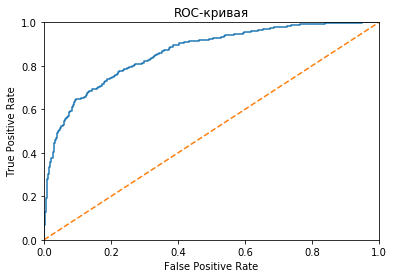

In [28]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) 
plt.figure()
plt.plot(fpr, tpr)
# ROC-кривая случайной модели (прямая)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')

plt.show()

Таким образом в ходе исследования удалось выбрать и обучить модель Случайного леса, которая при тестировании на валидационной и тестовой выборках показывает значения f1-меры равное 0.65 и 0.61, что больше 0.59 - необходимого условия задачи.
* Параметры модели:
        RandomForestClassifier(bootstrap=True, class_weight=None, criterion="gini",
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=64,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False).


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*